**DS4A CAPSTONE PROJECT: LOGISTIC REGRESSION**

Team #37 | Chiugo Ezekwem, Jasmin Alvarez, John Tsirigotis, Melanie Dakwa, Nelson Adeniji and Ryan Roberts

In [1]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.metrics import accuracy_score
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Change working directory
"""YOU WILL NEED TO CHANGE THIS FOR WHEREVER THE df_clean.csv
FILE IS LOCATED"""
%cd ~\\Desktop\\DS4A\\Team Project\\Data

C:\Users\tsiri\Desktop\DS4A\Team Project\Data


In [3]:
# Load in Data
df= pd.read_csv('df_clean.csv')
df_init = pd.read_csv('df_clean.csv')

In [4]:
df['Poverty_porp'] = df['PovertyRate']/100


In [5]:
df_test  = df[['County','POP2010','PovertyRate']]

In [6]:
df_test.head()

,County,POP2010,PovertyRate
0,Acadia,6213,34.0
1,Acadia,5988,7.3
2,Acadia,3582,8.4
3,Acadia,6584,11.3
4,Acadia,6093,18.4


In [7]:
df_test['Pov_Pop'] = round(df_test['POP2010']*(df_test['PovertyRate']/100))
df_test['Pov_Pop']

C:\Users\tsiri\AppData\Local\Temp/ipykernel_28912/3941948811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Pov_Pop'] = round(df_test['POP2010']*(df_test['PovertyRate']/100))


0       2112.0
1        437.0
2        301.0
3        744.0
4       1121.0
         ...  
1138    1299.0
1139     503.0
1140    1469.0
1141    1133.0
1142     775.0
Name: Pov_Pop, Length: 1143, dtype: float64

In [8]:
grouped_df = df_test.groupby('County')

# sum the numeric columns
grouped_df = grouped_df.sum()

grouped_df.head()

,POP2010,PovertyRate,Pov_Pop
County,,,
Acadia,61773,237.1,12464.0
Allen,25764,91.3,4421.0
Ascension,107215,209.5,13893.0
Assumption,23421,109.0,4018.0
Avoyelles,42073,198.0,9313.0


In [9]:
grouped_df['True_Pov_Pop'] = round(grouped_df['Pov_Pop']*100/grouped_df['POP2010'],2)

In [10]:
poverty = []
labels = []
for idx,row in grouped_df.iterrows():
    if row['True_Pov_Pop'] >= 20:
        poverty.append(1)
        labels.append('Yes')
    else:
        poverty.append(0)
        labels.append('No')
grouped_df['Poverty'] = poverty

In [11]:
len(grouped_df) #64 parishes
sum(grouped_df['Poverty']) #34 parishes

34

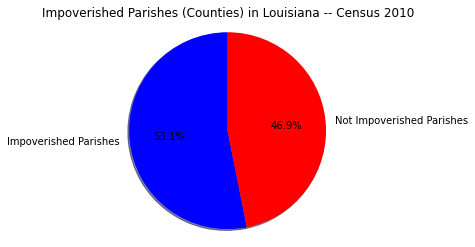

In [12]:
# create the pie chart
data = [34, 30]  # the values for each category
labels = ['Impoverished Parishes', 'Not Impoverished Parishes']  # the labels for each category

# create the pie chart
fig, ax = plt.subplots()
ax.pie(data, labels=labels, autopct='%1.1f%%',
       colors=['blue', 'red'], shadow=True, startangle=90, radius=1.5)
ax.axis('equal')  # make the pie chart circular

# set the title
ax.set_title('Impoverished Parishes (Counties) in Louisiana -- Census 2010')

# show the plot
plt.show()

In [13]:
grouped_df = grouped_df.reset_index()
# grouped_df = grouped_df.drop(columns=['index'])

In [14]:
grouped_df.columns

Index(['County', 'POP2010', 'PovertyRate', 'Pov_Pop', 'True_Pov_Pop',
       'Poverty'],
      dtype='object')

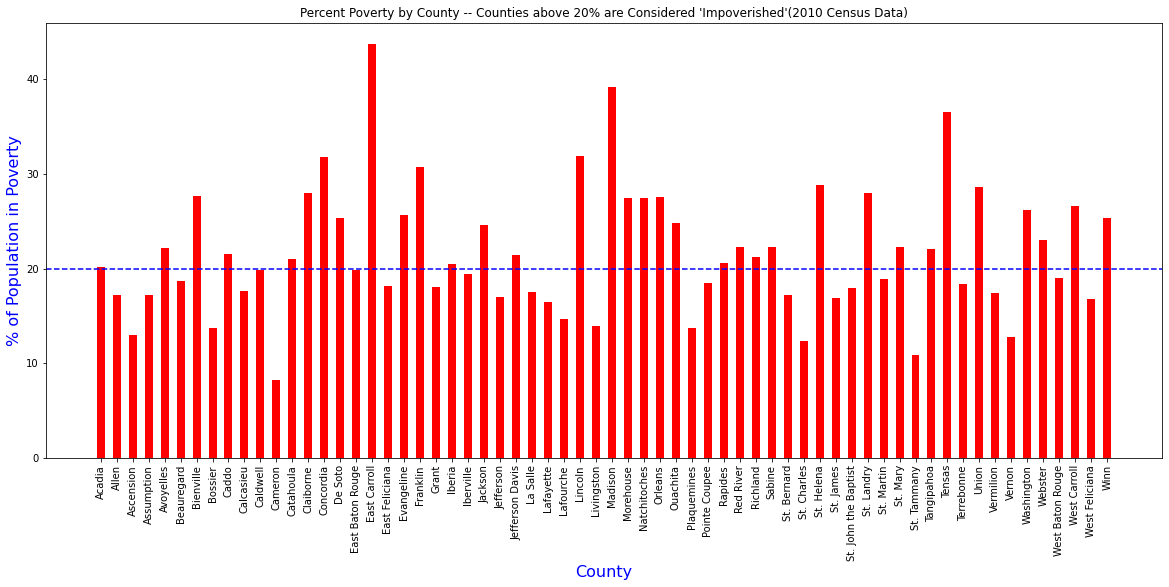

In [15]:
data = grouped_df['True_Pov_Pop']
labels = grouped_df['County']

fig = plt.figure(figsize=(20, 8))


plt.bar(labels, data, color='red', width=0.5)

# set the locations and labels for the x-axis ticks
plt.xticks(np.arange(len(labels)), labels, rotation=90)
plt.axhline(y=20, color='blue', linestyle='--')
plt.title("Percent Poverty by County -- Counties above 20% are Considered 'Impoverished'(2010 Census Data)")
plt.xlabel('County', fontsize=16, color='blue')
plt.ylabel('% of Population in Poverty', fontsize=16, color='blue')

plt.show()

In [16]:
df_desert = df[['County','POP2010','LILATracts_1And10']]
food_des = 0
for idx,row in df_desert.iterrows():
    if row['LILATracts_1And10'] == 1:
        food_des = food_des + row['POP2010']
food_des

non_food_des = sum(df_desert['POP2010']) - food_des

#non_food_des pop = 3561633
#food_des = 971739

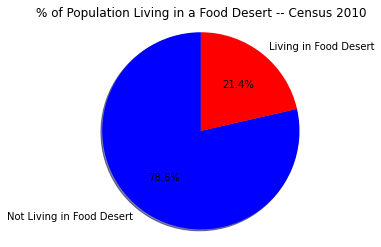

In [17]:
# create the pie chart
data = [3561633, 971739]  # the values for each category
labels = ['Not Living in Food Desert', 'Living in Food Desert']  # the labels for each category

# create the pie chart
fig, ax = plt.subplots()
ax.pie(data, labels=labels, autopct='%1.1f%%',
       colors=['blue', 'red'], shadow=True, startangle=90, radius=1.5)
ax.axis('equal')  # make the pie chart circular

# set the title
ax.set_title('% of Population Living in a Food Desert -- Census 2010')

# show the plot
plt.show()

In [18]:
df_desert_groupby = df_desert.groupby(['County','LILATracts_1And10']).sum()

In [19]:
df_desert_groupby.reset_index(inplace=True)
df_desert_groupby.head()

,County,LILATracts_1And10,POP2010
0,Acadia,0,39127
1,Acadia,1,22646
2,Allen,0,20438
3,Allen,1,5326
4,Ascension,0,85057


In [20]:
non_desert = df_desert_groupby[df_desert_groupby['LILATracts_1And10']==0]
desert = df_desert_groupby[df_desert_groupby['LILATracts_1And10']==1]

In [21]:
merged_df = pd.merge(desert, non_desert, on="County", how="outer")

# drop extra columns

merged_df.drop(columns=['LILATracts_1And10_x','LILATracts_1And10_y'],inplace=True)

merged_df = merged_df.rename(columns={"POP2010_x": "Food Desert Pop", "POP2010_y": "Non-Food Desert Pop"})
merged_df = merged_df.replace(np.nan,0)

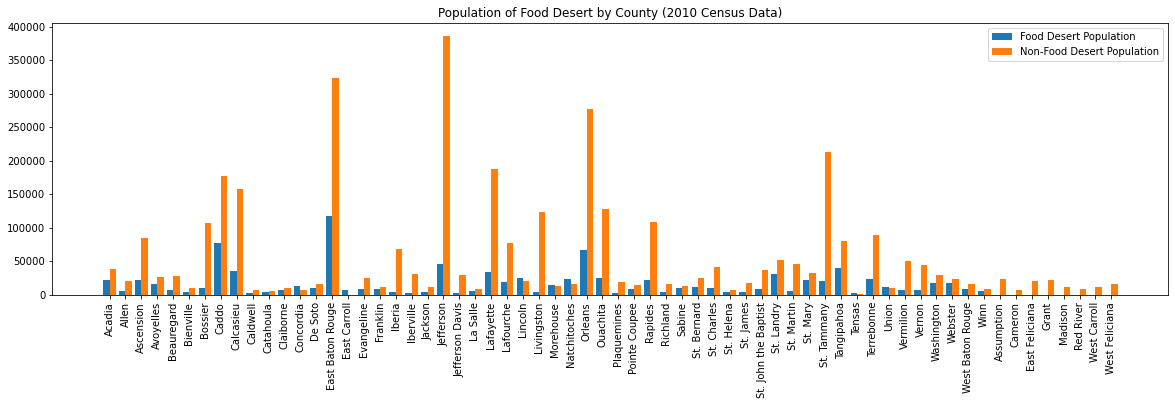

In [22]:
# Select the columns to use for the bars
labels = merged_df["County"]
bar1 = merged_df["Food Desert Pop"]
bar2 = merged_df["Non-Food Desert Pop"]

# Set the bar width
bar_width = 0.4

# Set the position of the bars
x1 = [i - bar_width/2 for i in range(len(labels))]
x2 = [i + bar_width/2 for i in range(len(labels))]

# Set the size of the figure
fig_width, fig_height = 20, 5

# Create the figure and the axis
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Add whitespace between the sets of bars
plt.subplots_adjust(wspace=0.7)

# Create the first set of bars
bar1_handle = ax.bar(x1, bar1, width=bar_width, align="center")

# Create the second set of bars
bar2_handle = ax.bar(x2, bar2, width=bar_width, align="center")

# Set the labels for the x-axis
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels,rotation=90)

# Add a key or legend manually
ax.legend([bar1_handle, bar2_handle], ["Food Desert Population", "Non-Food Desert Population"])

#Add title
plt.title("Population of Food Desert by County (2010 Census Data)")

# Show the plot
plt.show()


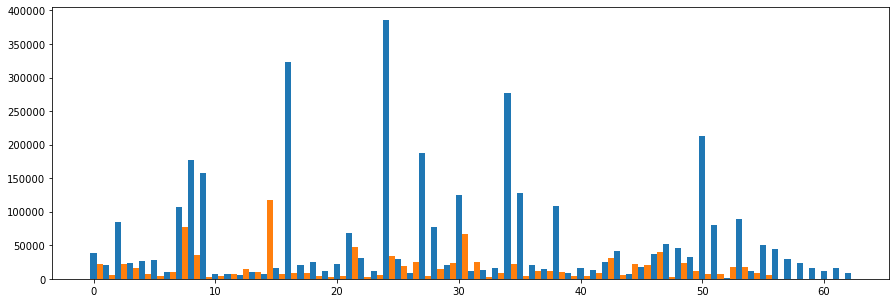

In [23]:
# Data for the first set of bars
y1 = list(non_desert['POP2010'])

# Data for the second set of bars
y2 = list(desert['POP2010'])

# Set the bar width
bar_width = 0.5

# Set the position of the bars
x1 = [i for i in range(len(y1))]
x2 = [i + bar_width for i in range(len(y2))]

# Set the size of the figure
fig_width, fig_height = 15, 5

# Create the figure and the axis
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Create the first set of bars
ax.bar(x1, y1, width=bar_width)

# Create the second set of bars
ax.bar(x2, y2, width=bar_width)

# Show the plot
plt.show()



C:\Users\tsiri\AppData\Local\Temp/ipykernel_28912/828271349.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_play['PovertyRate'] = df_play['PovertyRate']/100
C:\Users\tsiri\AppData\Local\Temp/ipykernel_28912/828271349.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_play['poverty'] = round(df_play['PovertyRate']*df_play['POP2010'])


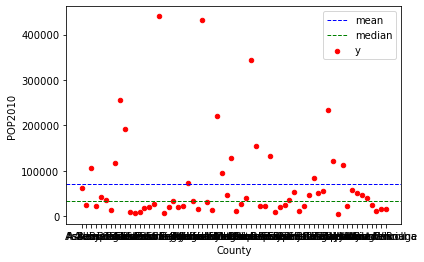

In [24]:
""" Find row with largest poverty proportion"""

# We will create a mini play dataset where we only have county,
# population, and PovertyRate

df_play = df[['County','POP2010','PovertyRate']]

# Then, we will edit the play dataframe so that PovertyRate is
# a true proportion

df_play['PovertyRate'] = df_play['PovertyRate']/100

# Figure out number that are in poverty
df_play['poverty'] = round(df_play['PovertyRate']*df_play['POP2010'])

# Group by County to get Number Impoverished
df_poverty = df_play.groupby('County').sum()

# Create final dataframe where we get true proportion of poverty
# by county

df_poverty['true_prop'] = df_poverty['poverty']/df_poverty['POP2010']

df_poverty = df_poverty.reset_index()
df_poverty.head()

# Now, we will look at a scatterplot to look at each county's population
mean = df_poverty['POP2010'].mean()
median = df_poverty['POP2010'].median()

ax = df_poverty.plot.scatter(x='County',y='POP2010',color='red',label='y')

# Look at horizontal lines that mark mean and median
ax.axhline(mean, color='blue',linestyle='dashed',linewidth=1,label='mean')
ax.axhline(median, color='green',linestyle='dashed',linewidth=1,label='median')
ax.legend()
plt.show()
max_value = df_poverty['true_prop'].max()
df_poverty.loc[df_poverty['true_prop'] == max_value]

"""We see that median is more inclusive, so we will only include
those and including median when deciding reference category"""

df_poverty = df_poverty[df_poverty['POP2010']>=median]


In [25]:
df = df.drop(columns=['CensusTract','State'])
# df['County'] = df['County'].astype('category')

In [26]:
# Drop poverty_porp column
df.drop(columns=['Poverty_porp'],inplace=True)

In [27]:
# We will need to turn the categorical variable, County, into int types
df_counties = pd.get_dummies(df,columns=['County'],drop_first=False)
df_counties = df_counties.drop(columns=['County_Lincoln'])

df_model = df[df['County'].isin(['East Baton Rouge','Orleans','Lincoln'])]

df_model = pd.get_dummies(df_model,columns=['County'],drop_first=False)
df_model = df_model.drop(columns=['County_Lincoln'])

In [28]:
df_model = df[df['County'].isin(['East Baton Rouge','Orleans','Lincoln'])]

In [29]:
df_model = pd.get_dummies(df_model,columns=['County'],drop_first=False)
df_model = df_model.drop(columns=['County_Lincoln'])

In [30]:
df_model.columns

Index(['Urban', 'POP2010', 'OHU2010', 'GroupQuartersFlag', 'NUMGQTRS',
       'PCTGQTRS', 'LILATracts_1And10', 'LILATracts_halfAnd10',
       'LILATracts_1And20', 'LILATracts_Vehicle', 'HUNVFlag',
       'LowIncomeTracts', 'PovertyRate', 'MedianFamilyIncome', 'TractLOWI',
       'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian',
       'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV',
       'TractSNAP', 'County_East Baton Rouge', 'County_Orleans'],
      dtype='object')

In [31]:
"""I'm using a logit model, which is similar to logistic regression.
I chose to use this because it will print out nicer results.
"""

# Add a column of ones to the DataFrame to use as the intercept term
df_model['intercept'] = 1

# Select the columns to use as independent variables

"""I am excluding all but one of the poverty variables as it could cause
multicollinearity issues"""

X = df_model[['intercept','Urban', 'PovertyRate', 'County_East Baton Rouge', 'County_Orleans',\
       'POP2010','OHU2010','GroupQuartersFlag','PCTGQTRS','HUNVFlag',\
       'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian',\
       'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV',\
       'TractSNAP']]

# Select the column to use as the dependent variable
y = df_model['LILATracts_1And10']

# Fit the model using the Logit class from statsmodels
model = sm.Logit(y, X)
result = model.fit()

# Print the p-values for the model coefficients
print(result.summary2())


         Current function value: 0.281594
         Iterations: 35
                                   Results: Logit
Model:                    Logit                   Pseudo R-squared:       0.444     
Dependent Variable:       LILATracts_1And10       AIC:                    199.1296  
Date:                     2023-01-14 19:38        BIC:                    275.3851  
No. Observations:         279                     Log-Likelihood:         -78.565   
Df Model:                 20                      LL-Null:                -141.26   
Df Residuals:             258                     LLR p-value:            2.8395e-17
Converged:                0.0000                  Scale:                  1.0000    
No. Iterations:           35.0000                                                   
------------------------------------------------------------------------------------
                         Coef.     Std.Err.     z    P>|z|     [0.025       0.975]  
----------------------------------

C:\Users\tsiri\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [32]:
# Try it again to excluding POP2010 as it's a high p-value item. We
# will also see how this affects AIC

# Select the columns to use as independent variables

"""I am excluding all but one of the poverty variables as it could cause
multicollinearity issues"""

X2 = df_model[['intercept','Urban', 'PovertyRate', 'County_East Baton Rouge', 'County_Orleans',\
       'OHU2010','GroupQuartersFlag','PCTGQTRS','HUNVFlag',\
       'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian',\
       'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV',\
       'TractSNAP']]

# Select the column to use as the dependent variable
y = df_model['LILATracts_1And10']

# Fit the model using the Logit class from statsmodels
model = sm.Logit(y, X2)
result = model.fit()

# Print the p-values for the model coefficients
print(result.summary2())

         Current function value: 0.281594
         Iterations: 35
                                   Results: Logit
Model:                    Logit                   Pseudo R-squared:       0.444     
Dependent Variable:       LILATracts_1And10       AIC:                    197.1296  
Date:                     2023-01-14 19:38        BIC:                    269.7538  
No. Observations:         279                     Log-Likelihood:         -78.565   
Df Model:                 19                      LL-Null:                -141.26   
Df Residuals:             259                     LLR p-value:            1.0811e-17
Converged:                0.0000                  Scale:                  1.0000    
No. Iterations:           35.0000                                                   
------------------------------------------------------------------------------------
                         Coef.     Std.Err.     z    P>|z|     [0.025       0.975]  
----------------------------------

C:\Users\tsiri\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [33]:
# Again without GroupQuartersFlags

"""I am excluding all but one of the poverty variables as it could cause
multicollinearity issues"""

X3 = df_model[['intercept','Urban', 'PovertyRate', 'County_East Baton Rouge', 'County_Orleans',\
       'OHU2010','PCTGQTRS','HUNVFlag','TractKids', 'TractSeniors', 'TractWhite', 'TractBlack',\
       'TractAsian','TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV',\
       'TractSNAP']]

# Select the column to use as the dependent variable
y = df_model['LILATracts_1And10']

# Fit the model using the Logit class from statsmodels
model = sm.Logit(y, X3)
result = model.fit()

# Print the p-values for the model coefficients
print(result.summary2())

"""Still moving down, so we will take away another"""

         Current function value: 0.283746
         Iterations: 35
                                 Results: Logit
Model:                   Logit                  Pseudo R-squared:      0.440     
Dependent Variable:      LILATracts_1And10      AIC:                   196.3303  
Date:                    2023-01-14 19:38       BIC:                   265.3234  
No. Observations:        279                    Log-Likelihood:        -79.165   
Df Model:                18                     LL-Null:               -141.26   
Df Residuals:            260                    LLR p-value:           6.7659e-18
Converged:               0.0000                 Scale:                 1.0000    
No. Iterations:          35.0000                                                 
---------------------------------------------------------------------------------
                         Coef.    Std.Err.     z    P>|z|     [0.025     0.975]  
------------------------------------------------------------------

C:\Users\tsiri\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


'Still moving down, so we will take away another'

In [34]:
# Again without OHU2010

"""I am excluding all but one of the poverty variables as it could cause
multicollinearity issues"""

X4 = df_model[['intercept','Urban', 'PovertyRate', 'County_East Baton Rouge', 'County_Orleans',\
       'PCTGQTRS','HUNVFlag','TractKids', 'TractSeniors', 'TractWhite', 'TractBlack',\
       'TractAsian','TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV',\
       'TractSNAP']]

# Select the column to use as the dependent variable
y = df_model['LILATracts_1And10']

# Fit the model using the Logit class from statsmodels
model = sm.Logit(y, X4)
result = model.fit()

# Print the p-values for the model coefficients
print(result.summary2())

"""Still moving down, so we will take away another"""

         Current function value: 0.286182
         Iterations: 35
                                 Results: Logit
Model:                   Logit                  Pseudo R-squared:      0.435     
Dependent Variable:      LILATracts_1And10      AIC:                   195.6894  
Date:                    2023-01-14 19:38       BIC:                   261.0512  
No. Observations:        279                    Log-Likelihood:        -79.845   
Df Model:                17                     LL-Null:               -141.26   
Df Residuals:            261                    LLR p-value:           4.4475e-18
Converged:               0.0000                 Scale:                 1.0000    
No. Iterations:          35.0000                                                 
---------------------------------------------------------------------------------
                         Coef.    Std.Err.     z    P>|z|     [0.025     0.975]  
------------------------------------------------------------------

C:\Users\tsiri\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


'Still moving down, so we will take away another'

In [35]:
# Again without PCTQTRS

"""I am excluding all but one of the poverty variables as it could cause
multicollinearity issues"""

X5 = df_model[['intercept','Urban', 'PovertyRate', 'County_East Baton Rouge', 'County_Orleans',\
       'HUNVFlag','TractKids', 'TractSeniors', 'TractWhite', 'TractBlack',\
       'TractAsian','TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV',\
       'TractSNAP']]

# Select the column to use as the dependent variable
y = df_model['LILATracts_1And10']

# Fit the model using the Logit class from statsmodels
model = sm.Logit(y, X5)
result = model.fit()

# Print the p-values for the model coefficients
print(result.summary2())

"""Still moving down, so we will take away another"""

         Current function value: 0.288301
         Iterations: 35
                                 Results: Logit
Model:                   Logit                  Pseudo R-squared:      0.431     
Dependent Variable:      LILATracts_1And10      AIC:                   194.8722  
Date:                    2023-01-14 19:38       BIC:                   256.6028  
No. Observations:        279                    Log-Likelihood:        -80.436   
Df Model:                16                     LL-Null:               -141.26   
Df Residuals:            262                    LLR p-value:           2.6472e-18
Converged:               0.0000                 Scale:                 1.0000    
No. Iterations:          35.0000                                                 
---------------------------------------------------------------------------------
                         Coef.    Std.Err.     z    P>|z|     [0.025     0.975]  
------------------------------------------------------------------

C:\Users\tsiri\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


'Still moving down, so we will take away another'

In [36]:
# Again without Urban -- since there is almost a perfect correlation, we will remove

"""I am excluding all but one of the poverty variables as it could cause
multicollinearity issues"""

X6 = df_model[['intercept','PovertyRate', 'County_East Baton Rouge', 'County_Orleans',\
       'HUNVFlag','TractKids', 'TractSeniors', 'TractWhite', 'TractBlack',\
       'TractAsian','TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV',\
       'TractSNAP']]

# Select the column to use as the dependent variable
y = df_model['LILATracts_1And10']

# Fit the model using the Logit class from statsmodels
model = sm.Logit(y, X6)
result = model.fit()

# Print the p-values for the model coefficients
print(result.summary2())

"""Still moving down, so we will take away another"""

Optimization terminated successfully.
         Current function value: 0.300473
         Iterations 8
                            Results: Logit
Model:                 Logit              Pseudo R-squared:  0.407     
Dependent Variable:    LILATracts_1And10  AIC:               199.6641  
Date:                  2023-01-14 19:38   BIC:               257.7635  
No. Observations:      279                Log-Likelihood:    -83.832   
Df Model:              15                 LL-Null:           -141.26   
Df Residuals:          263                LLR p-value:       1.8738e-17
Converged:             1.0000             Scale:             1.0000    
No. Iterations:        8.0000                                          
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
intercept               -2.4791   1.4146 -1.7525 0.0797 -5.2517

'Still moving down, so we will take away another'

In [37]:
df_model = df.copy()

In [38]:
# Because AIC goes up, we will keep Urban in the equation. Lets sum together all of the nonwhite tracts

column_names = ['TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN','TractOMultir','TractHispanic']
df_model['TractNonWhite']= df[column_names].sum(axis=1)

# And lets get rid of those columns now
df_model.drop(columns=column_names,inplace=True)

In [39]:
county_list = ['Lincoln','East Baton Rouge','Orleans']
df_model = df[df['County'].isin(county_list)]

df_model = pd.get_dummies(df_model,columns=['County'],drop_first=False)
df_model = df_model.drop(columns=['County_Lincoln'])

column_names = ['TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN','TractOMultir','TractHispanic']
df_model['TractNonWhite']= df_model[column_names].sum(axis=1)

df_model['intercept'] = 1


In [40]:
df_model.columns

Index(['Urban', 'POP2010', 'OHU2010', 'GroupQuartersFlag', 'NUMGQTRS',
       'PCTGQTRS', 'LILATracts_1And10', 'LILATracts_halfAnd10',
       'LILATracts_1And20', 'LILATracts_Vehicle', 'HUNVFlag',
       'LowIncomeTracts', 'PovertyRate', 'MedianFamilyIncome', 'TractLOWI',
       'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian',
       'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV',
       'TractSNAP', 'County_East Baton Rouge', 'County_Orleans',
       'TractNonWhite', 'intercept'],
      dtype='object')

In [41]:
# Now lets try running the regression
X7 = df_model[['intercept','PovertyRate', 'County_East Baton Rouge', 'County_Orleans',\
       'HUNVFlag','TractKids', 'TractSeniors', 'TractWhite', 'TractNonWhite', 'TractHUNV',\
       'TractSNAP']]

# Select the column to use as the dependent variable
y = df_model['LILATracts_1And10']

# Fit the model using the Logit class from statsmodels
model = sm.Logit(y, X7)
result = model.fit()

# Print the p-values for the model coefficients
print(result.summary2())

"""Still moving down, so we will take away another"""

Optimization terminated successfully.
         Current function value: 0.314863
         Iterations 7
                            Results: Logit
Model:                 Logit              Pseudo R-squared:  0.378     
Dependent Variable:    LILATracts_1And10  AIC:               197.6936  
Date:                  2023-01-14 19:38   BIC:               237.6369  
No. Observations:      279                Log-Likelihood:    -87.847   
Df Model:              10                 LL-Null:           -141.26   
Df Residuals:          268                LLR p-value:       2.3256e-18
Converged:             1.0000             Scale:             1.0000    
No. Iterations:        7.0000                                          
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
intercept               -2.2976   1.3284 -1.7297 0.0837 -4.9012

'Still moving down, so we will take away another'

In [42]:
# It looks like TractSeniors may not be necessary. Lets remove and check AIC

X8 = df_model[['intercept','PovertyRate', 'County_East Baton Rouge', 'County_Orleans',\
       'HUNVFlag','TractKids', 'TractWhite', 'TractNonWhite', 'TractHUNV',\
       'TractSNAP']]

# Select the column to use as the dependent variable
y = df_model['LILATracts_1And10']

# Fit the model using the Logit class from statsmodels
model = sm.Logit(y, X8)
result = model.fit()

# Print the p-values for the model coefficients
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.315478
         Iterations 7
                            Results: Logit
Model:                 Logit              Pseudo R-squared:  0.377     
Dependent Variable:    LILATracts_1And10  AIC:               196.0367  
Date:                  2023-01-14 19:38   BIC:               232.3489  
No. Observations:      279                Log-Likelihood:    -88.018   
Df Model:              9                  LL-Null:           -141.26   
Df Residuals:          269                LLR p-value:       7.6334e-19
Converged:             1.0000             Scale:             1.0000    
No. Iterations:        7.0000                                          
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
intercept               -2.6095   1.2138 -2.1498 0.0316 -4.9885

In [43]:
# Lastly, lets try removing TractSNAP, which could be another indicator of poverty (maybe)

X9 = df_model[['intercept','PovertyRate', 'County_East Baton Rouge', 'County_Orleans',\
       'HUNVFlag','TractKids', 'TractWhite', 'TractNonWhite', 'TractHUNV']]

# Select the column to use as the dependent variable
y = df_model['LILATracts_1And10']

# Fit the model using the Logit class from statsmodels
model = sm.Logit(y, X9)
result = model.fit()

# Print the p-values for the model coefficients
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.318498
         Iterations 7
                            Results: Logit
Model:                 Logit              Pseudo R-squared:  0.371     
Dependent Variable:    LILATracts_1And10  AIC:               195.7218  
Date:                  2023-01-14 19:38   BIC:               228.4027  
No. Observations:      279                Log-Likelihood:    -88.861   
Df Model:              8                  LL-Null:           -141.26   
Df Residuals:          270                LLR p-value:       4.4499e-19
Converged:             1.0000             Scale:             1.0000    
No. Iterations:        7.0000                                          
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
intercept               -2.4973   1.2005 -2.0802 0.0375 -4.8504

In [44]:
# For fun, lets check out the interaction term between PovertyRate and White
df_model['PovertyWhite'] = df_model['PovertyRate']*df_model['TractWhite']

In [45]:
X10 = df_model[['intercept','PovertyRate', 'County_East Baton Rouge', 'County_Orleans',\
       'HUNVFlag','TractKids', 'TractWhite', 'TractNonWhite', 'TractHUNV','PovertyWhite']]

# Select the column to use as the dependent variable
y = df_model['LILATracts_1And10']

# Fit the model using the Logit class from statsmodels
model = sm.Logit(y, X10)
result = model.fit()

# Print the p-values for the model coefficients
print(result.summary2())
'''There seems to be a correlation, so lets try this with poverty rate and nonwhite'''

Optimization terminated successfully.
         Current function value: 0.303765
         Iterations 8
                            Results: Logit
Model:                 Logit              Pseudo R-squared:  0.400     
Dependent Variable:    LILATracts_1And10  AIC:               189.5011  
Date:                  2023-01-14 19:38   BIC:               225.8132  
No. Observations:      279                Log-Likelihood:    -84.751   
Df Model:              9                  LL-Null:           -141.26   
Df Residuals:          269                LLR p-value:       3.5676e-20
Converged:             1.0000             Scale:             1.0000    
No. Iterations:        8.0000                                          
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
intercept               -1.2682   1.3910 -0.9118 0.3619 -3.9945

'There seems to be a correlation, so lets try this with poverty rate and nonwhite'

In [46]:
df_model['PovertyNonWhite'] = df_model['PovertyRate']*df_model['TractNonWhite']

In [47]:
X11 = df_model[['intercept','PovertyRate', 'County_East Baton Rouge', 'County_Orleans',\
       'HUNVFlag','TractKids', 'TractWhite', 'TractNonWhite', 'TractHUNV','PovertyWhite',\
        'PovertyNonWhite']]

# Select the column to use as the dependent variable
y = df_model['LILATracts_1And10']

# Fit the model using the Logit class from statsmodels
model = sm.Logit(y, X11)
result = model.fit()

# Print the p-values for the model coefficients
print(result.summary2())

"""That didn't seem to help, so we will remove that and check HUNVFlag and poverty"""

Optimization terminated successfully.
         Current function value: 0.303764
         Iterations 8
                            Results: Logit
Model:                 Logit              Pseudo R-squared:  0.400     
Dependent Variable:    LILATracts_1And10  AIC:               191.5001  
Date:                  2023-01-14 19:38   BIC:               231.4434  
No. Observations:      279                Log-Likelihood:    -84.750   
Df Model:              10                 LL-Null:           -141.26   
Df Residuals:          268                LLR p-value:       1.3113e-19
Converged:             1.0000             Scale:             1.0000    
No. Iterations:        8.0000                                          
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
intercept               -1.2567   1.4363 -0.8750 0.3816 -4.0717

"That didn't seem to help, so we will remove that and check HUNVFlag and poverty"

In [48]:
df['Poverty_NoCar'] = df['PovertyRate']*df['TractHUNV']

In [49]:
# X12 = df_model[['intercept','PovertyRate', 'County_East Baton Rouge', 'County_Orleans',\
#        'HUNVFlag','TractKids', 'TractWhite', 'TractNonWhite', 'TractHUNV','PovertyWhite',\
#        'Poverty_NoCar']]

# # Select the column to use as the dependent variable
# y = df_model['LILATracts_1And10']

# # Fit the model using the Logit class from statsmodels
# model = sm.Logit(y, X12)
# result = model.fit()

# # Print the p-values for the model coefficients
# print(result.summary2())

"""That didn't seem to help, so we will remove that and check HUNVFlag interaction with race"""

KeyError: "['Poverty_NoCar'] not in index"

In [50]:
df_model['White_NoCar'] = df_model['TractWhite']*df_model['HUNVFlag']

In [51]:
X13 = df_model[['intercept','PovertyRate', 'County_East Baton Rouge', 'County_Orleans',\
       'HUNVFlag','TractKids', 'TractWhite', 'TractNonWhite', 'TractHUNV','PovertyWhite',\
       'White_NoCar']]

# Select the column to use as the dependent variable
y = df_model['LILATracts_1And10']

# Fit the model using the Logit class from statsmodels
model = sm.Logit(y, X13)
result = model.fit()

# Print the p-values for the model coefficients
print(result.summary2())

"""That seems to improve the model slightly. Lets check white and kids"""

Optimization terminated successfully.
         Current function value: 0.298168
         Iterations 9
                            Results: Logit
Model:                 Logit              Pseudo R-squared:  0.411     
Dependent Variable:    LILATracts_1And10  AIC:               188.3779  
Date:                  2023-01-14 19:38   BIC:               228.3213  
No. Observations:      279                Log-Likelihood:    -83.189   
Df Model:              10                 LL-Null:           -141.26   
Df Residuals:          268                LLR p-value:       3.0635e-20
Converged:             1.0000             Scale:             1.0000    
No. Iterations:        9.0000                                          
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
intercept               -1.1265   1.4431 -0.7806 0.4350 -3.9549

'That seems to improve the model slightly. Lets check white and kids'

In [52]:
df_model['White_Kids'] = df_model['TractKids']*df_model['TractWhite']

In [53]:
X14 = df_model[['intercept','PovertyRate', 'County_East Baton Rouge', 'County_Orleans',\
       'HUNVFlag','TractKids', 'TractWhite', 'TractNonWhite', 'TractHUNV','PovertyWhite',\
       'White_NoCar','White_Kids']]

# Select the column to use as the dependent variable
y = df_model['LILATracts_1And10']

# Fit the model using the Logit class from statsmodels
model = sm.Logit(y, X14)
result = model.fit()

# Print the p-values for the model coefficients
print(result.summary2())

"""Doesn't improve, so lets remove. Lets try nonwhite and kids"""

Optimization terminated successfully.
         Current function value: 0.297082
         Iterations 9
                            Results: Logit
Model:                 Logit              Pseudo R-squared:  0.413     
Dependent Variable:    LILATracts_1And10  AIC:               189.7718  
Date:                  2023-01-14 19:38   BIC:               233.3464  
No. Observations:      279                Log-Likelihood:    -82.886   
Df Model:              11                 LL-Null:           -141.26   
Df Residuals:          267                LLR p-value:       8.1633e-20
Converged:             1.0000             Scale:             1.0000    
No. Iterations:        9.0000                                          
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
intercept               -0.8107   1.4991 -0.5408 0.5887 -3.7489

"Doesn't improve, so lets remove. Lets try nonwhite and kids"

In [ ]:
df_model['NonWhite_Kids'] = df_model['TractKids']*df_model['TractNonWhite']

In [ ]:
X15 = df_model[['intercept','PovertyRate', 'County_East Baton Rouge', 'County_Orleans',\
       'HUNVFlag','TractKids', 'TractWhite', 'TractNonWhite', 'TractHUNV','PovertyWhite',\
       'White_NoCar','NonWhite_Kids']]

# Select the column to use as the dependent variable
y = df_model['LILATracts_1And10']

# Fit the model using the Logit class from statsmodels
model = sm.Logit(y, X15)
result = model.fit()

# Print the p-values for the model coefficients
print(result.summary2())

"""Also doesn't improve the model"""

In [ ]:
### WE WILL MOVE FORWARD WITH THE FOLLOWING MODEL
X_final = df_model[['intercept','PovertyRate', 'County_East Baton Rouge', 'County_Orleans',\
       'HUNVFlag','TractKids', 'TractWhite', 'TractNonWhite', 'TractHUNV','PovertyWhite',\
       'White_NoCar']]

# Select the column to use as the dependent variable
y = df_model['LILATracts_1And10']

# Fit the model using the Logit class from statsmodels
model = sm.Logit(y, X_final)
result = model.fit()

# Print the p-values for the model coefficients
print(result.summary2())


In [ ]:
# Lets compare to models with different definitions of food desert
y2 = df_model['LILATracts_halfAnd10']
y3 = df_model['LILATracts_1And20']

In [ ]:
# Fit the model using the Logit class from statsmodels
model2 = sm.Logit(y2, X_final)
result2 = model2.fit()

# Print the p-values for the model coefficients
print(result2.summary2())

In [ ]:
# Fit the model using the Logit class from statsmodels
model = sm.Logit(y, X_final)
result = model.fit()

# Print the p-values for the model coefficients
print(result.summary2())

In [ ]:
df_model = df[['LILATracts_1And10','PovertyRate', 'County_East Baton Rouge', 'County_Orleans',\
       'HUNVFlag','TractKids', 'TractWhite', 'TractNonWhite', 'TractHUNV','PovertyWhite',\
       'White_NoCar']]

# Compute the correlations between the variables
corr = df_model.corr()

# Create a heatmap of the correlations
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='Reds', vmin=-1, vmax=1)

# Show the plot
plt.show()

In [55]:
# Get correlation map
df_new = df.copy()
df_new = df_new.drop(['LILATracts_halfAnd10','LILATracts_1And20','NUMGQTRS','PCTGQTRS'],axis=1)
df_new.columns
# df_new = df_new[['URBAN','POP2010','GroupQuartersFlag','LILATracts_Vehicle','LowIncomeTracts']]
# mask = ['LILATracts_halfAnd10','LILATracts_1And20']

# df_new = df.drop([mask],axis=1)
# We will need to turn the categorical variable, County, into int types


df_new = df_new[df_new['County'].isin(['East Baton Rouge','Orleans','Lincoln'])]
df_new = pd.get_dummies(df_new,columns=['County'],drop_first=False)
df_new = df_new.drop(columns=['County_Lincoln'])

corr_matrix = df_new.corr()

# df_model = df_new[df_new['County'].isin(['East Baton Rouge','Orleans','Lincoln'])]

# df_model = pd.get_dummies(df_model,columns=['County'],drop_first=False)
# df_model = df_model.drop(columns=['County_Lincoln'])

,Urban,POP2010,OHU2010,GroupQuartersFlag,LILATracts_1And10,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome,...,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Poverty_NoCar,County_East Baton Rouge,County_Orleans
Urban,1.000000,-0.074416,-0.048228,0.027379,0.133069,0.064541,0.011017,0.232137,0.216098,0.027912,...,0.041446,0.064306,-0.093182,0.031714,0.046673,0.160797,0.061709,0.147059,-0.095103,0.194470
POP2010,-0.074416,1.000000,0.952650,-0.075041,0.181428,0.089256,0.126693,-0.202811,-0.248202,0.220415,...,0.338288,0.287648,0.670726,0.558869,0.485582,-0.034337,0.342207,-0.116057,0.646572,-0.695560
OHU2010,-0.048228,0.952650,1.000000,-0.152901,0.102052,0.045615,0.090487,-0.269542,-0.306991,0.300814,...,0.322035,0.256301,0.664392,0.550975,0.490251,0.017039,0.281558,-0.108019,0.625573,-0.666295
GroupQuartersFlag,0.027379,-0.075041,-0.152901,1.000000,-0.052828,-0.053991,-0.058611,0.004686,0.082773,-0.138561,...,-0.043359,-0.032790,-0.098321,-0.075251,-0.049731,-0.098028,-0.106773,-0.051037,-0.073127,0.079144
LILATracts_1And10,0.133069,0.181428,0.102052,-0.052828,1.000000,0.499533,0.443512,0.375787,0.273887,-0.260264,...,0.035034,0.074651,0.056917,0.113265,0.045225,0.088251,0.367577,0.103840,0.117319,-0.169106
LILATracts_Vehicle,0.064541,0.089256,0.045615,-0.053991,0.499533,1.000000,0.921181,0.384057,0.367000,-0.344159,...,-0.042864,0.098750,-0.012049,0.011719,-0.032462,0.379251,0.523050,0.378847,0.047512,-0.080741
HUNVFlag,0.011017,0.126693,0.090487,-0.058611,0.443512,0.921181,1.000000,0.276625,0.309307,-0.281854,...,-0.032784,0.084974,0.027682,0.041891,-0.006767,0.362410,0.475958,0.333927,0.034032,-0.095918
LowIncomeTracts,0.232137,-0.202811,-0.269542,0.004686,0.375787,0.384057,0.276625,1.000000,0.768396,-0.601480,...,-0.082339,-0.054728,-0.153766,-0.024256,-0.061766,0.429288,0.486386,0.504442,-0.149064,0.136982
PovertyRate,0.216098,-0.248202,-0.306991,0.082773,0.273887,0.367000,0.309307,0.768396,1.000000,-0.609444,...,-0.087007,-0.003153,-0.181265,-0.079274,-0.087377,0.515323,0.438467,0.701443,-0.217888,0.186988
MedianFamilyIncome,0.027912,0.220415,0.300814,-0.138561,-0.260264,-0.344159,-0.281854,-0.601480,-0.609444,1.000000,...,0.125220,0.067241,0.133623,0.052288,0.113568,-0.380408,-0.480282,-0.484250,0.086953,-0.079895


In [70]:
df_race = df_new[['TractWhite', 'TractBlack', 'TractAsian','TractOMultir',\
                 'TractHispanic']]

In [72]:
df_new['NonWhite'] = df_new['TractAsian'] + df_new['TractBlack'] + df_new['TractOMultir']+df_new['TractHispanic']

In [74]:
df_new = df_new.drop(columns={'TractBlack', 'TractAsian',\
       'TractOMultir', 'TractHispanic'})

In [96]:
X_new = df_model[['intercept','PovertyRate', 'County_East Baton Rouge', 'County_Orleans',\
       'HUNVFlag','TractKids', 'TractWhite', 'TractNonWhite', 'TractHUNV','PovertyWhite',\
       'White_NoCar','White_Kids']]

# Select the column to use as the dependent variable
y = df_model['LILATracts_1And10']

# Fit the model using the Logit class from statsmodels
model = sm.Logit(y, X14)
result = model.fit()

# Print the p-values for the model coefficients
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.297082
         Iterations 9
                            Results: Logit
Model:                 Logit              Pseudo R-squared:  0.413     
Dependent Variable:    LILATracts_1And10  AIC:               189.7718  
Date:                  2023-01-14 21:37   BIC:               233.3464  
No. Observations:      279                Log-Likelihood:    -82.886   
Df Model:              11                 LL-Null:           -141.26   
Df Residuals:          267                LLR p-value:       8.1633e-20
Converged:             1.0000             Scale:             1.0000    
No. Iterations:        9.0000                                          
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
intercept               -0.8107   1.4991 -0.5408 0.5887 -3.7489

In [84]:
# Compute the correlation matrix
corr_matrix = df_new.corr()

# Select the row for variable 'A'
row_a = corr_matrix.loc['LILATracts_1And10',:]

# Print the selected row
print(row_a)


Urban                      0.133069
GroupQuartersFlag         -0.052828
LILATracts_1And10          1.000000
LILATracts_Vehicle         0.499533
HUNVFlag                   0.443512
PovertyRate                0.273887
TractLOWI                  0.419202
TractWhite                -0.137421
TractNHOPI                 0.074651
TractAIAN                  0.056917
TractSNAP                  0.367577
Poverty_NoCar              0.103840
County_East Baton Rouge    0.117319
County_Orleans            -0.169106
NonWhite                   0.415010
Name: LILATracts_1And10, dtype: float64


In [79]:
# Compute the correlation matrix
corr_matrix = df_new.corr()

# Select the row for variable 'A'
row_a = corr_matrix.loc['County_East Baton Rouge',:]

# Print the selected row
print(row_a)


Urban                     -0.095103
POP2010                    0.646572
OHU2010                    0.625573
GroupQuartersFlag         -0.073127
LILATracts_1And10          0.117319
LILATracts_Vehicle         0.047512
HUNVFlag                   0.034032
LowIncomeTracts           -0.149064
PovertyRate               -0.217888
MedianFamilyIncome         0.086953
TractLOWI                  0.389234
TractKids                  0.605173
TractSeniors               0.557409
TractWhite                 0.472601
TractNHOPI                 0.111774
TractAIAN                  0.389018
TractHUNV                 -0.121152
TractSNAP                  0.231627
Poverty_NoCar             -0.154411
County_East Baton Rouge    1.000000
County_Orleans            -0.923974
NonWhite                   0.395148
Name: County_East Baton Rouge, dtype: float64


In [81]:
drop1 = ['LowIncomeTracts','MedianFamilyIncome','TractHUNV','POP2010',\
 'OHU2010','TractKids','TractSeniors']

df_new.drop(columns={'LowIncomeTracts','MedianFamilyIncome','TractHUNV','POP2010',\
 'OHU2010','TractKids','TractSeniors'},inplace=True)

In [88]:
df_new.columns

Index(['Urban', 'GroupQuartersFlag', 'LILATracts_1And10', 'LILATracts_Vehicle',
       'HUNVFlag', 'PovertyRate', 'TractLOWI', 'TractWhite', 'TractNHOPI',
       'TractAIAN', 'TractSNAP', 'Poverty_NoCar', 'County_East Baton Rouge',
       'County_Orleans', 'NonWhite', 'intercept'],
      dtype='object')

In [121]:
df_new['intercept'] = 1

df_new['vehicle*orleans'] = df_new['LILATracts_Vehicle']*df_new['County_Orleans']
df_new['vehicle*baton'] = df_new['LILATracts_Vehicle']*df_new['County_East Baton Rouge']
df_new['poverty*nonwhite'] = df_new['PovertyRate']*df_new['NonWhite']

xvars = df_new[['intercept','LILATracts_Vehicle',\
       'PovertyRate',\
       'County_East Baton Rouge',\
       'County_Orleans', 'NonWhite','vehicle*orleans','vehicle*baton']]
 
# # Select the column to use as the dependent variable
y = df_new['LILATracts_1And10']

# # Fit the model using the Logit class from statsmodels
model = sm.Logit(y, xvars)
result = model.fit()

# Print the p-values for the model coefficients
print(result.summary2())





Optimization terminated successfully.
         Current function value: 0.340614
         Iterations 7
                            Results: Logit
Model:                 Logit              Pseudo R-squared:  0.327     
Dependent Variable:    LILATracts_1And10  AIC:               206.0626  
Date:                  2023-01-14 22:00   BIC:               235.1123  
No. Observations:      279                Log-Likelihood:    -95.031   
Df Model:              7                  LL-Null:           -141.26   
Df Residuals:          271                LLR p-value:       3.8683e-17
Converged:             1.0000             Scale:             1.0000    
No. Iterations:        7.0000                                          
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
intercept               -1.7608   0.9714 -1.8126 0.0699 -3.6648

In [ ]:
e

In [107]:
df_new[['LILATracts_1And10','LILATracts_Vehicle',\
       'PovertyRate', 'TractLOWI', 'TractWhite',\
       'County_East Baton Rouge',\
       'County_Orleans', 'NonWhite', 'intercept']].corr()

,LILATracts_1And10,LILATracts_Vehicle,PovertyRate,TractLOWI,TractWhite,County_East Baton Rouge,County_Orleans,NonWhite,intercept
LILATracts_1And10,1.000000,0.499533,0.273887,0.419202,-0.137421,0.117319,-0.169106,0.415010,NaN
LILATracts_Vehicle,0.499533,1.000000,0.367000,0.425744,-0.277114,0.047512,-0.080741,0.437014,NaN
PovertyRate,0.273887,0.367000,1.000000,0.304112,-0.465197,-0.217888,0.186988,0.171989,NaN
TractLOWI,0.419202,0.425744,0.304112,1.000000,0.124710,0.389234,-0.454483,0.803490,NaN
TractWhite,-0.137421,-0.277114,-0.465197,0.124710,1.000000,0.472601,-0.522831,-0.081946,NaN
County_East Baton Rouge,0.117319,0.047512,-0.217888,0.389234,0.472601,1.000000,-0.923974,0.395148,NaN
County_Orleans,-0.169106,-0.080741,0.186988,-0.454483,-0.522831,-0.923974,1.000000,-0.405637,NaN
NonWhite,0.415010,0.437014,0.171989,0.803490,-0.081946,0.395148,-0.405637,1.000000,NaN
intercept,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
